Решить задачи указанным в задании численным методом на любом языке программирования. 
В результате работы программы выдать количество сделанных итераций, найденное решение 
и последовательность {x_k} на каждой итерации. Сделать визуализацию решения задачи.

Задача 3. Из начального приближения x0 = (1, 1) решить задачу безусловной минимизации функции
f: R^2 -> R, f(x) = x1^2 + 2*x2^2
методом сопряженных градиентов.

In [3]:
from sympy import lambdify, symbols, derive_by_array
import numpy as np


n = 2
x1, x2 = symbols("x(1:3)")
expr = x1**2 + 2*x2**2
A = np.array([[expr.coeff(x1**2), expr.coeff(x1*x2)], [expr.coeff(x1*x2), expr.coeff(x2**2)]])
b = np.array([expr.coeff(x1), expr.coeff(x2)])
f = lambdify((x1, x2), expr, "numpy")
df = lambdify((x1, x2), derive_by_array(expr, [x1, x2]), "numpy")

x = np.array([[1, 1]])

alpha = np.array([])
beta = np.array([])
d = np.array([-df(*x[0])])
for k in range(1000):
    if (df(*x[k]) <= np.array([10**(-9), 10**(-9)])).all():
        print("Остановка, f'(x[k]) = 0")
        break
    
    if k >= 1:
        Ad = A.dot(d[k-1])
        beta = np.append(beta, [0])
        beta[k-1] = Ad.dot(df(*x[k]))/Ad.dot(d[k-1])
        # print(f"beta[{k-1}]={beta[k-1]}")
        d = np.append(d, [-df(*x[k]) + beta[k-1]*d[k-1]], axis=0)
    
    alpha = np.append(alpha, -(np.dot(2*A.dot(x[k]) + b, d[k]) / (2*A.dot(d[k]).dot(d[k]))))
    
    x_next = [x[k] + alpha[k]*d[k]]
    x = np.append(x, x_next, axis=0)
    
    print(f"{k=}, x[{k+1}]={x[k+1]}")
    
    if k >= n - 1:
        print("\nОстановка, k >= n-1")
        break
    
print("Всего шагов:", k)
print("Найденное решение: x =", x[k+1])

k=0, x[1]=[4/9 -1/9]
k=1, x[2]=[1.11022302462516e-16 -2.77555756156289e-17]

Остановка, k >= n-1
Всего шагов: 1
Найденное решение: x = [1.11022302462516e-16 -2.77555756156289e-17]


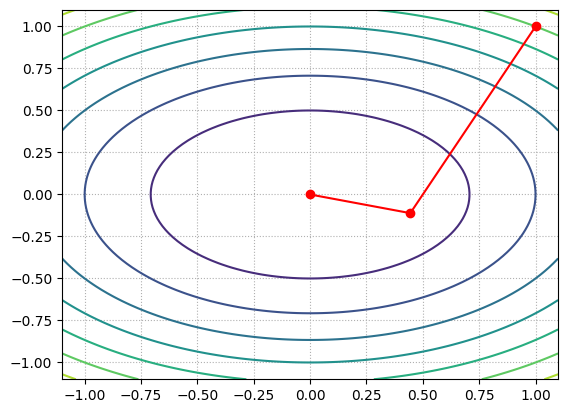

In [4]:
import matplotlib.pyplot as plt


a = b = np.linspace(-1.1, 1.1, 100)
x1_plot, x2_plot = np.meshgrid(a, b)

plt.contour(x1_plot, x2_plot, f(x1_plot, x2_plot))
plt.plot(x.T[0], x.T[1], marker='o',color="red")
plt.grid(linestyle=":")